# Kalman Filtering

In [1]:
import Simulator
import Observation
import Statistics
import KalmanFilter

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [2]:
timestamp = "2021_08_09-15_26_48"

grid, simulator = Simulator.from_file(timestamp)

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [3]:
statistics = Statistics.Statistics(simulator)

Please remember to set priors!


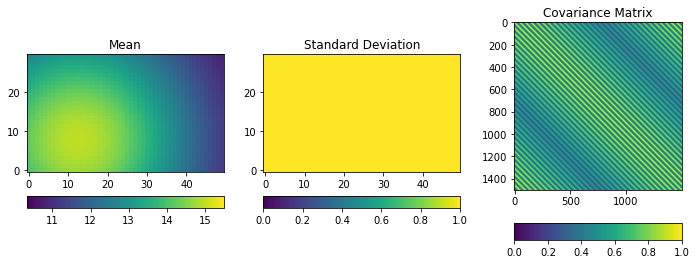

In [4]:
prior_args = Statistics.prior_args_from_file(timestamp)
statistics.set_prior(prior_args)

statistics.plot()

## Loading observations 

Observation positions which are fixed for a setup and values from the truth

In [5]:
obs_timestamp = "2021_08_09-15_26_55"
observation = Observation.from_file(grid, timestamp, obs_timestamp)

Remember to set observation positions and to set/observe values!


In [6]:
import numpy as np
import scipy.stats

In [7]:
trials = 10

pdf_values = np.zeros(trials)

for s in range(trials):
    print("Experiment ", s)
        
    observation.N_obs = 0 

    for t in range(10):
        statistics.propagate(nt=25)
        observation.observe(statistics.mean)

    kalmanFilter = KalmanFilter.Kalman(statistics, observation)

    for t in range(observation.N_obs):
        statistics.propagate(25)
        kalmanFilter.filter(statistics.mean, statistics.cov, observation.obses[t])

    pdf_values[s] = scipy.stats.norm.pdf(observation.obses[t][0], loc=statistics.mean[observation.obsidx[0]], scale=statistics.stddev[observation.obsidx[0]])

Experiment  0
Experiment  1
Experiment  2
Experiment  3
Experiment  4
Experiment  5
Experiment  6
Experiment  7
Experiment  8
Experiment  9


In [8]:
pdf_values

array([1.7392252 , 1.73233569, 1.44136354, 1.8064709 , 1.73164317,
       1.36940044, 1.80284542, 1.50474098, 1.82869784, 1.84426199])